# Bivariate EDA
## Numerical × numerical


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

covid_totals = pd.read_csv("../05-data_cleaning/data/covidtotals.csv")


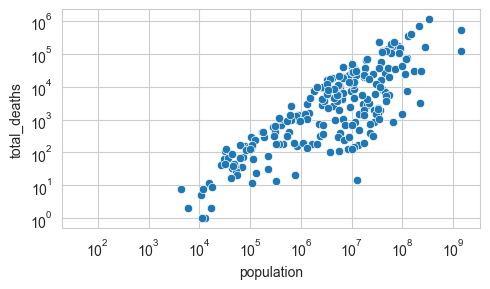

In [9]:
# let's inspect the relationship between population and total_deaths using a scatter plot

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(5,3), tight_layout=True)

sns.scatterplot(x=covid_totals['population'],
                y=covid_totals['total_deaths'],
                ax=ax)

plt.xscale('log')
plt.yscale('log')


<Axes: xlabel='pop_density', ylabel='total_deaths'>

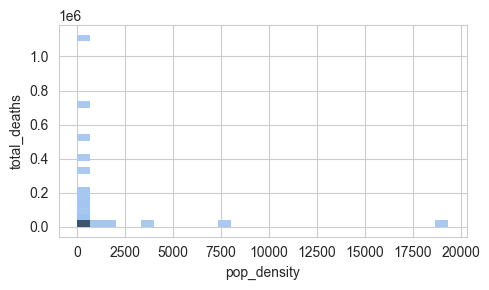

In [19]:
# Let's use hist plot to analyze pop_density and total_deaths

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(5,3), tight_layout=True)

sns.histplot(x=covid_totals['pop_density'],
            y=covid_totals['total_deaths'],
            ax=ax)


<Axes: xlabel='population', ylabel='total_deaths'>

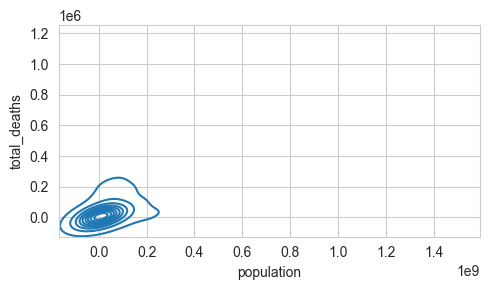

In [24]:
# KDE plot

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(5,3), tight_layout=True)

sns.kdeplot(x=covid_totals['population'],
            y=covid_totals['total_deaths'],
            ax=ax)


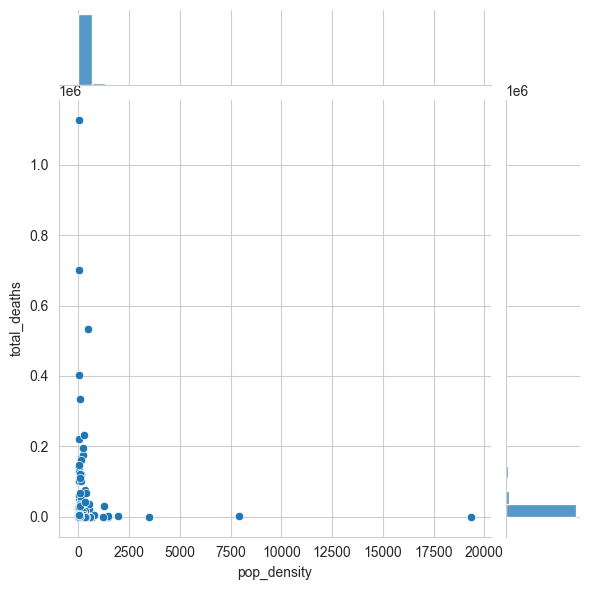

In [69]:
# joint plot

sns.jointplot(data=covid_totals, x='pop_density', y='total_deaths')


<Axes: xlabel='population', ylabel='total_deaths'>

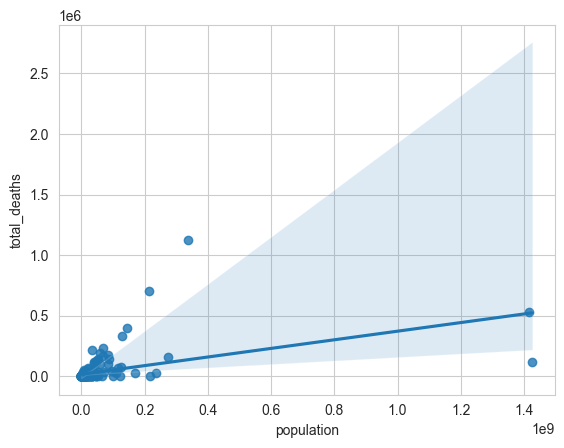

In [72]:
# reg plots

sns.regplot(data=covid_totals, x='population', y='total_deaths')


In [ ]:
# correlation

covid_totals[['population','pop_density','total_cases','total_deaths']].corr()


## Numerical × categorical


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nls97 = pd.read_csv("../05-data_cleaning/data/nls97.csv")

In [33]:
# We wanted to study gender difference in income here, so we compare summary statistics across gender group

nls97.groupby("gender")['wageincome'].describe()


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,2470.0,41278.920243,34047.097440,0.0,20000.0,35000.0,52000.0,235884.0
Male,2621.0,57202.818390,44711.847126,0.0,30000.0,47000.0,70000.0,235884.0


<Axes: xlabel='wageincome', ylabel='Count'>

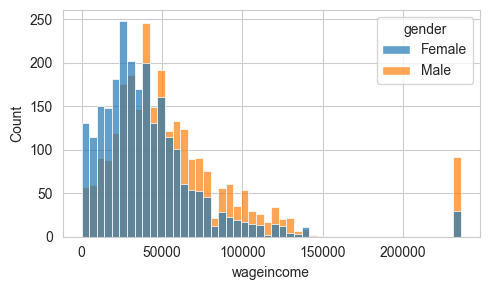

In [42]:
# let's inspect the difference between income distribution of two genders.
# Note that histogram plots could be unclear and overlapping, and you can adjust alpha value (transparency)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(5,3), tight_layout=True)

sns.histplot(data=nls97, x=nls97['wageincome'],
             hue='gender', # hue="gender" use gender variable to group wageincome
             bins=50, alpha=.7,
                ax=ax)

<Axes: xlabel='wageincome', ylabel='Density'>

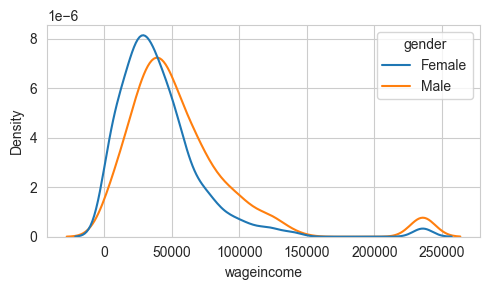

In [39]:
# we could also use KDE plot
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(5,3), tight_layout=True)

sns.kdeplot(data=nls97, x=nls97['wageincome'],
             hue='gender',
                ax=ax)

<Axes: xlabel='wageincome'>

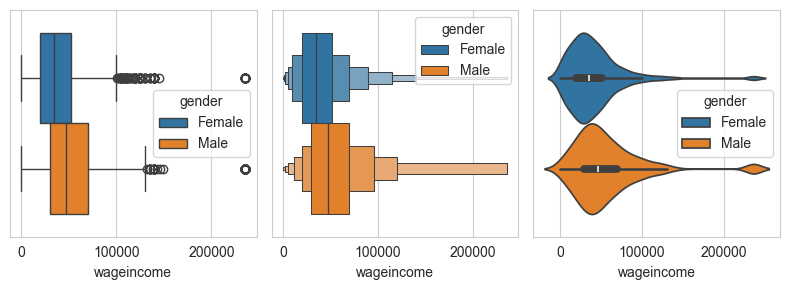

In [53]:
fig, axes=plt.subplots(nrows=1, ncols=3, figsize=(8,3), tight_layout=True)

sns.boxplot(data=nls97, x='wageincome', hue='gender',ax=axes.flat[0])
sns.boxenplot(data=nls97, x='wageincome', hue='gender',ax=axes.flat[1])
sns.violinplot(data=nls97, x='wageincome', hue='gender',ax=axes.flat[2])

## Categorical × categorical

use `pd.crosstab()`

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nls97 = pd.read_csv("../05-data_cleaning/data/nls97.csv")

In [62]:
# if we want to study gender and marital status and gender

pd.crosstab(nls97['gender'], nls97['maritalstatus'],
            normalize="columns") # normalize could take True, ‘all’, ‘index’, ‘columns’

maritalstatus,Divorced,Married,Never-married,Separated,Widowed
gender,,,,,
Female,0.59276,0.533594,0.472523,0.512987,0.826087
Male,0.40724,0.466406,0.527477,0.487013,0.173913


<Axes: xlabel='gender', ylabel='count'>

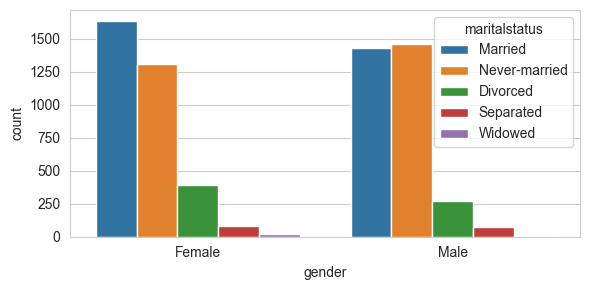

In [67]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(6,3), tight_layout=True)

sns.countplot(data=nls97, x='gender', hue='maritalstatus',
              stat='count')

## [Optional] Numerical × Numerical × Categorical


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nls97 = pd.read_csv("../05-data_cleaning/data/nls97.csv")

<Axes: xlabel='gpaoverall', ylabel='wageincome'>

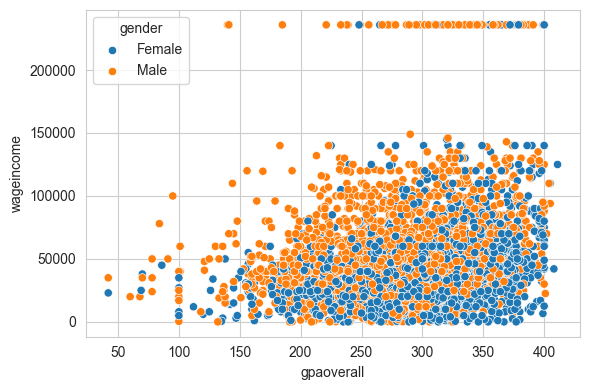

In [94]:
# Scatter plot by group (gender)

fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(6,4), tight_layout=True)

sns.scatterplot(data=nls97, x='gpaoverall', y='wageincome',
                hue='gender')


<Axes: xlabel='gpaoverall', ylabel='wageincome'>

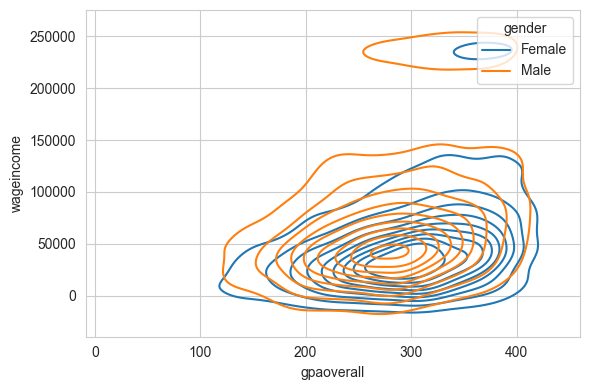

In [83]:
# KDE plot by group (gender)

fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(6,4), tight_layout=True)

sns.kdeplot(data=nls97, x='gpaoverall', y='wageincome',
                hue='gender')

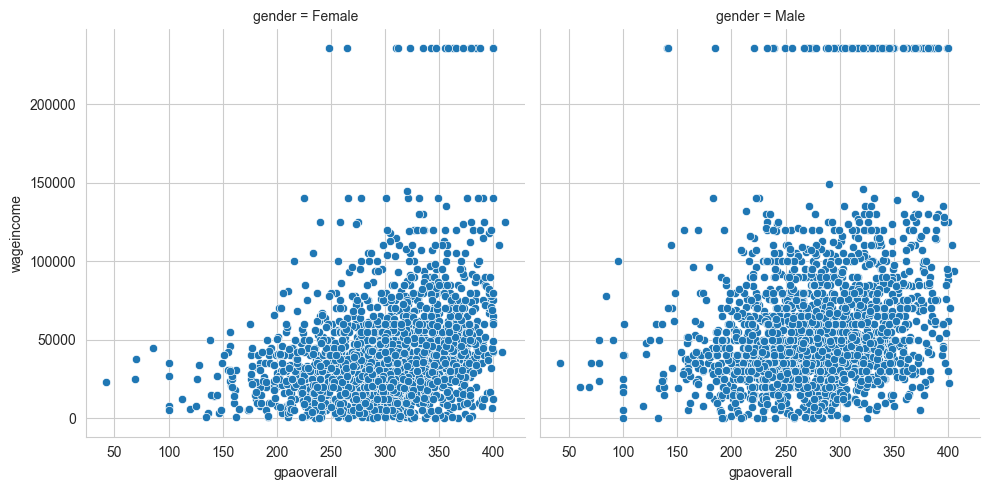

In [96]:
# Faceting (separate panels)

# fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(6,4), tight_layout=True)

sns.relplot(data=nls97, x='gpaoverall', y='wageincome',
            kind='scatter',
            col='gender')

## [Optional] Numerical × Categorical × Categorical
For example, income by gender across marital status

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nls97 = pd.read_csv("../05-data_cleaning/data/nls97.csv")

<Axes: xlabel='maritalstatus', ylabel='wageincome'>

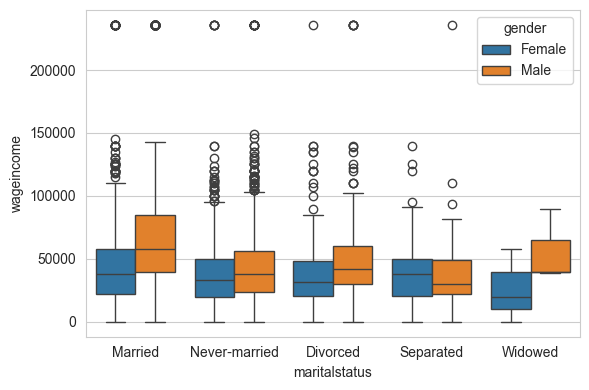

In [98]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(6,4), tight_layout=True)

sns.boxplot(data=nls97, x='maritalstatus', y='wageincome',hue='gender')

<Axes: xlabel='maritalstatus', ylabel='wageincome'>

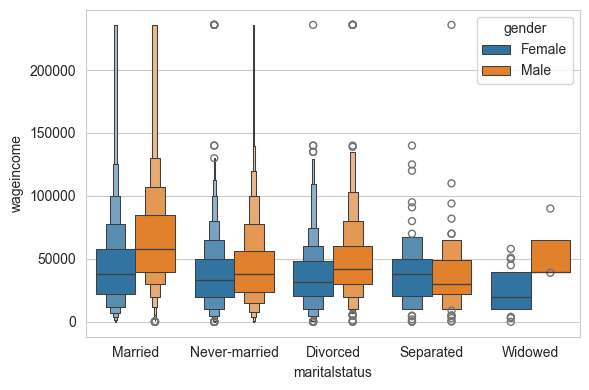

In [99]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(6,4), tight_layout=True)

sns.boxenplot(data=nls97, x='maritalstatus', y='wageincome',hue='gender')

## [Optional] Pair plot

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

covid_totals = pd.read_csv("../05-data_cleaning/data/covidtotals.csv")


In [121]:
plotting_variables = ['population','total_cases', 'gdp_per_capita', 'hosp_beds','life_expectancy']

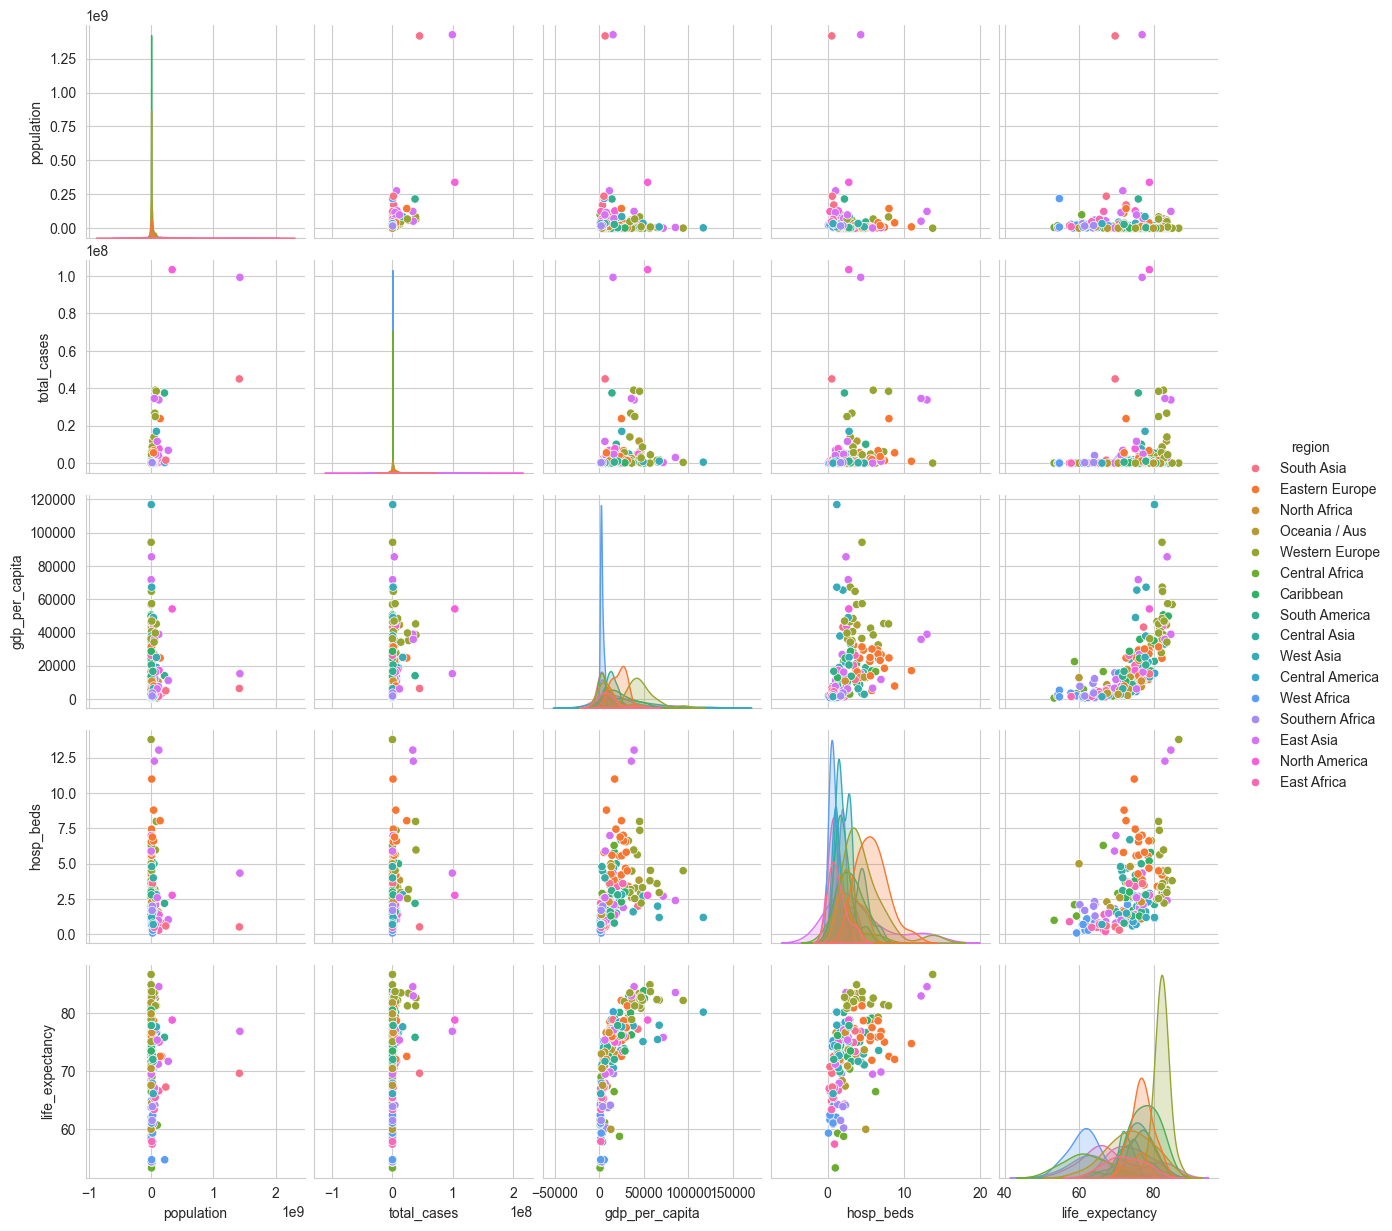

In [123]:
g=sns.pairplot(data=covid_totals,
               vars=plotting_variables,
               hue='region',
               kind='scatter',
               diag_kind='auto')

In [ ]:
g=sns.pairplot(data=covid_totals[plotting_variables])
for ax in g.axes.flat:
    ax.set_yscale('log')
    ax.set_xscale('log')